In [6]:
import pandas as pd
import torch
from LSTMPredict import LSTMPredict,PreictTest
from modules import CNN_LSTM_Model
import pickle
device = "cuda" if torch.cuda.is_available() else "cpu"
import matplotlib.pyplot as plt
import os
from torch.utils.data import Dataset, DataLoader

In [7]:
symbol = "ACB"

In [8]:
csv_file_path = f'D:\KLTN\RLServer\LSTMCSV\{symbol}.csv'

# Read the CSV file using pandas
data = pd.read_csv(csv_file_path)

In [5]:
model = CNN_LSTM_Model(input_size = 20,output_size = 1)
model.to(device)
model.load_state_dict(torch.load(f"checkpoint/{symbol}_forecast_model.pt", map_location=torch.device('cpu')))
x_scaler = pickle.load(open(f"checkpoint/{symbol}_LSTM_xscaler.pkl", 'rb'))
y_scaler = pickle.load(open(f"checkpoint/{symbol}_LSTM_yscaler.pkl", 'rb'))
result = LSTMPredict(data,x_scaler,y_scaler,model)

ValueError: could not convert string to float: '2014-01-14'

In [5]:
result['Close'] = result['Close'].fillna(result['forecast'])

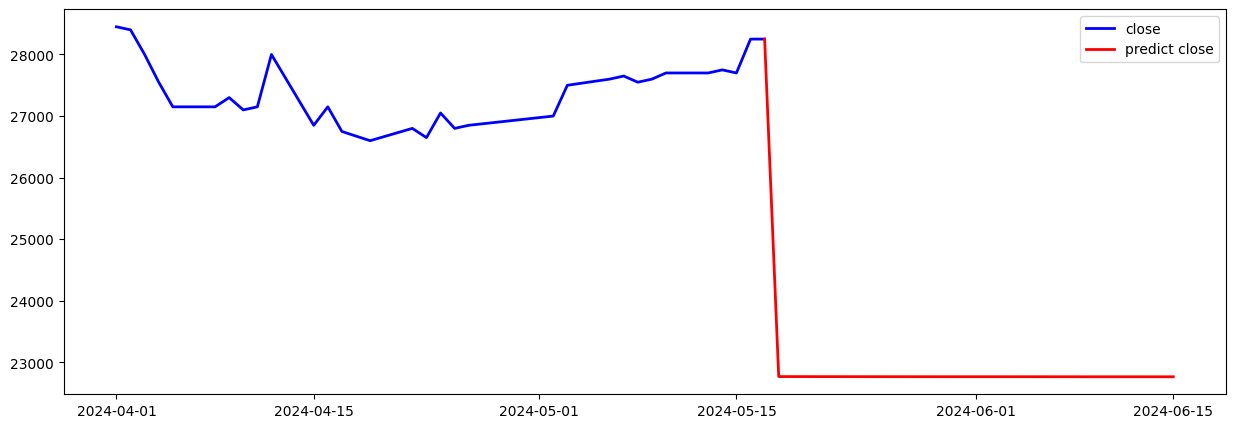

In [6]:
fig = plt.figure(figsize = (15, 5))
# Vẽ 60 ngày cuối cùng
plt.plot(result['Date'].iloc[-60:-29], result['Close'].iloc[-60:-29], color='blue', lw=2, label='close')

# Vẽ 30 ngày cuối cùng với màu khác
plt.plot(result['Date'].iloc[-30:], result['Close'].iloc[-30:], color='red', lw=2, label='predict close')
plt.legend()
plt.show()

In [64]:
# result = result.drop(columns=['forecast', 'signal'], errors='ignore')
# output_directory = "LSTMCSV"
# output_file_path = os.path.join(output_directory, f'{symbol}predictions.csv')
# result.to_csv(output_file_path, index=False)